# ::: Titanic Project :::

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


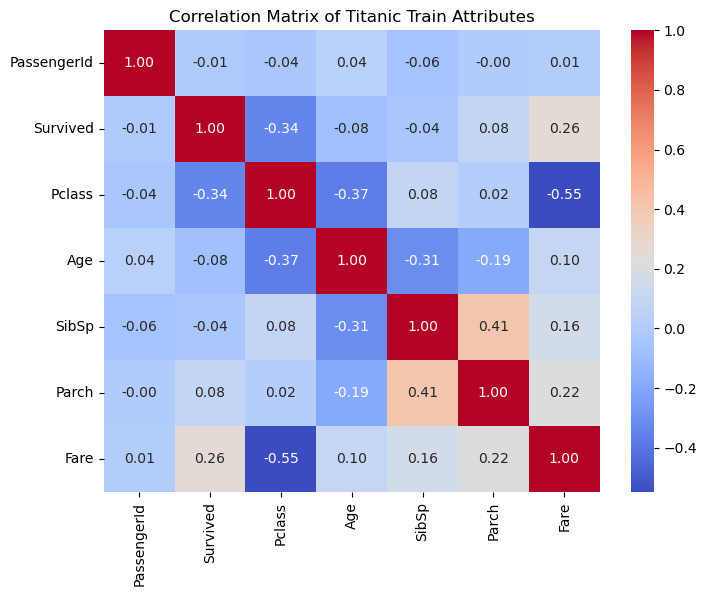

In [12]:
plt.figure(figsize=(8,6),facecolor="white")
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='coolwarm',linecolor="black",cbar=True)
plt.title("Correlation Matrix of Titanic Train Attributes")
plt.show()

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Filling Age column missing values with median of the Attribute

In [15]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [19]:
df['Cabin'].fillna('Unknown',inplace=True)

In [21]:
most_common_embarked = df['Embarked'].mode()[0]

In [22]:
most_common_embarked

'S'

In [26]:
df['Embarked'].fillna(most_common_embarked,inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Data cleaning and Filling None values is done 

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Surviving rate by Passngers Class ::

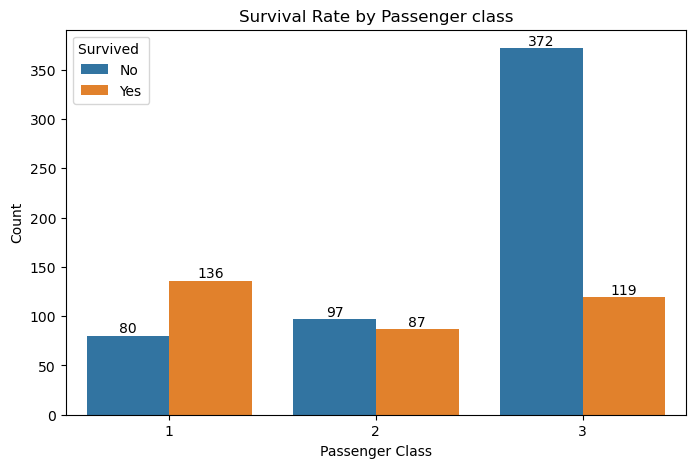

In [34]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Pclass',hue='Survived',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Survival Rate by Passenger class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived ",loc="upper left" , labels=['No','Yes'])
plt.show()

from the above bar chart we can understand that passengers beloging to class - 1st have survived more as compared to other

# Survived Rate By Sex

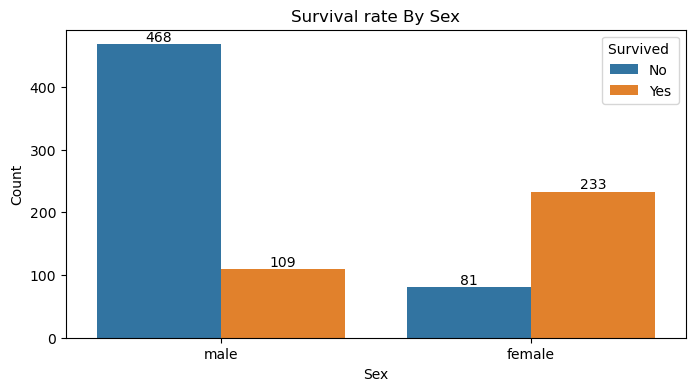

In [40]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Sex',hue="Survived",data=df)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Survival rate By Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived ",loc="upper right" , labels=['No','Yes'])
plt.show()

The survival rate by sex indicates that females had a significantly higher survival rate than males, highlighting the "women and children first" protocol during the evacuation.

# Distribution of Age with Survival

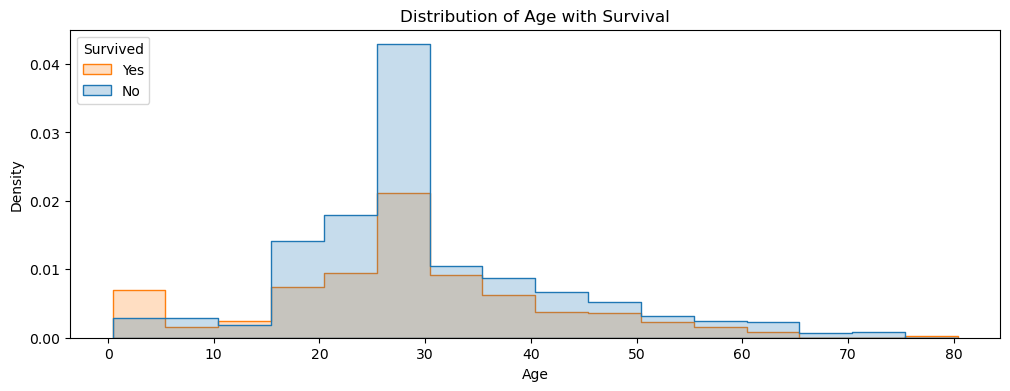

In [49]:
plt.figure(figsize=(12,4))
sns.histplot(data=df,x="Age",hue="Survived",element="step",stat="density",binwidth=5)
plt.title("Distribution of Age with Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Survived",labels=['Yes','No'],loc="upper left")
plt.show()

From the above we can see that younger passengers have more density of surving than the elder / older passengers ... the main three attrubites responsible for Surving of the passenger in Titanioc are as below:

1. Age
2. Sex
3. Pclass

Converting String to Numerical for moel processing column Sex

In [64]:
label_encoding = LabelEncoder()

In [65]:
df['Sex'] = label_encoding.fit_transform(df['Sex'])

In [68]:
x=df[['Age','Sex','Pclass']]
y=df['Survived']

In [69]:
x

,Age,Sex,Pclass
0,22.0,1,3
1,38.0,0,1
2,26.0,0,3
3,35.0,0,1
4,35.0,1,3
...,...,...,...
886,27.0,1,2
887,19.0,0,1
888,28.0,0,3
889,26.0,1,1


In [70]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# ::: Model :::

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
model_lr = LinearRegression()

In [74]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [75]:
pred_y = model_lr.predict(x_test)

In [76]:
pred_y

array([ 0.09186487,  0.25221755,  0.12339272,  0.8562245 ,  0.65252104,
        0.94958052,  0.59734732,  0.13915664,  0.64463908,  0.97716738,
        0.4007473 ,  0.02880919,  0.59734732,  0.08398291,  0.23251265,
        0.98899032,  0.38104239,  0.59734732,  0.26798148,  0.36133749,
        0.10762879,  0.41257024,  0.63281614,  0.12339272,  0.09186487,
        0.16280252,  0.38892435,  0.25221755,  0.1864484 ,  0.58552438,
        0.1273337 ,  0.6209932 ,  0.43621612,  0.59734732,  0.13127468,
        0.09580585,  0.43621612,  0.59734732,  0.9338166 ,  0.09186487,
        0.29162736,  0.08792389,  0.09186487,  0.09186487,  0.53035065,
        0.13915664,  0.1273337 ,  0.11156977,  0.10762879,  0.31798671,
        0.68798986,  0.84711504,  0.04457311,  0.50321278, -0.05395139,
        0.98110836,  0.24827657,  0.854997  ,  0.74193608,  0.63281614,
        0.11945174,  0.82863764,  0.76952294,  0.43621612,  0.09186487,
        0.65523451,  0.29162736,  0.08792389,  0.13521566,  0.84

In [79]:
r2Score = r2_score(y_test,pred_y)

In [82]:
print("R2 Score :: ","{:.2f}".format(r2Score))

R2 Score ::  0.44
